In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
################################## Data Cleaning Starts #####################################
#importing the dataset
import numpy as np
import pandas as pd
df=pd.read_csv('E:\Loan_Case_Study\loan\loan.csv')
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Shape of the dataset
df.shape

(39717, 111)

In [6]:
#Finding the null value count
round(100*(df.isnull().sum()/len(df.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
#Finding all the null rows  --there are no duplicate rows
df[df.isnull().all(axis=1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [8]:
# ---------------------------Remove columns --------------------------------------------------
# Removing columns that will not be used in further analysis
df.isnull().mean()
rm_cols = df.isnull().sum() / len(df)
rm_cols1= rm_cols[rm_cols > 0.80].index
df.drop(rm_cols1, axis=1, inplace=True)

In [9]:
# After removing the columns here is shape of the dataset
df.shape

(39717, 55)

In [10]:
# Finding agan the null value's
round(100*(df.isnull().sum()/len(df.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
#immute the value for the column mths_since_last_delinq, to get rid off the null values
df.loc[pd.isnull(df['mths_since_last_delinq']), ['mths_since_last_delinq']] = 0
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
#immute the value for the column desc. For the null records of desc the Application_type have the INDIVIDUAL BORROWERS so added the same
df.loc[pd.isnull(df['desc']), ['desc']] = 'INDIVIDUAL BORROWERS'
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [14]:
## remove % symbol and convert int_rate to numeric
df['int_rate']=df['int_rate'].str.replace('%',"")


In [15]:
## remove % symbol and convert int_rate to numeric
df['revol_util']=df['revol_util'].str.replace('%',"")


In [16]:
## remove months symbol and convert int_rate to numeric
df['term']=df['term'].str.replace('months',"")

In [17]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
################################## Data Cleaning Ends #####################################

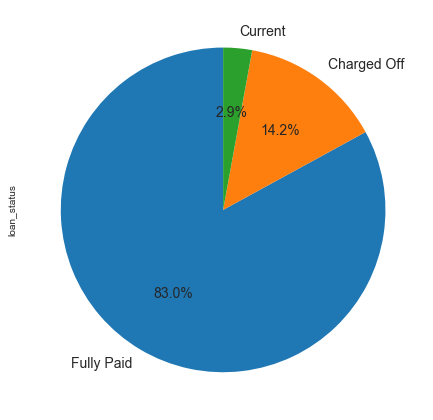

In [19]:
################################## Univariate Analysis Starts #####################################
# Data Cleaning & Univariate Analysisfor loan
# Validate Case Mismatch & Other Data Issue
# loan_status column - 3 unique values : Fully Paid,Charged Off and Active  - no case mismatch
# most of the loan are in fully paid status.
# Pie chart indicate that a significant number of borrowers in our dataset paid off their loan - 
# 83% of loan borrowers Fully paid the they amount borrowed, 2.9% of loan borrowers are paying currently
# 14.2% unfortunately defaulted. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax1=plt.subplot(121,aspect='equal')
df.loan_status.value_counts().plot(kind='pie',ax=ax1,autopct='%1.1f%%',startangle=90,shadow=False,legend=False,fontsize=14)
plt.show()

In [20]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [21]:
# grade column - 7 unique values : A,B,C,D,E,F,G - no case mismatch
# B grade were issued most of the loans and G grade were issued the least number of loans.
df.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

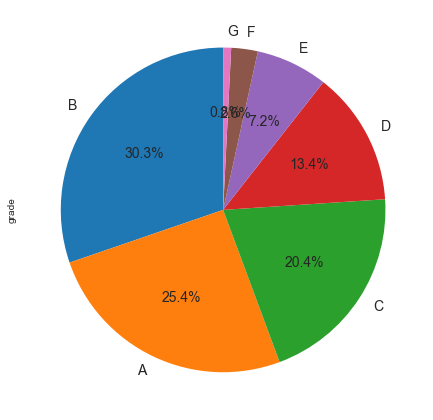

In [22]:
plt.figure(figsize=(16,8))
ax1=plt.subplot(121,aspect='equal')
df.grade.value_counts().plot(kind='pie',ax=ax1,autopct='%1.1f%%',startangle=90,shadow=False,legend=False,fontsize=14)
plt.show()

In [23]:
# sub_grade column - 35 unique values : example - A1,A2,A3,B1,C1 etc - no case mismatch
# B3 sub-grade were issued most of the loans and G5 sub-grade were issued the least number of loans.
df.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

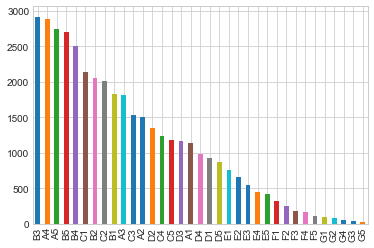

In [25]:
df.sub_grade.value_counts().plot(kind='bar')
plt.show()

In [26]:
# verification_status column - 3 unique values : verified,source verified ans not verified- no mismatch
# applicants having verification status as NOT Verified were issued most of the loans
df.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

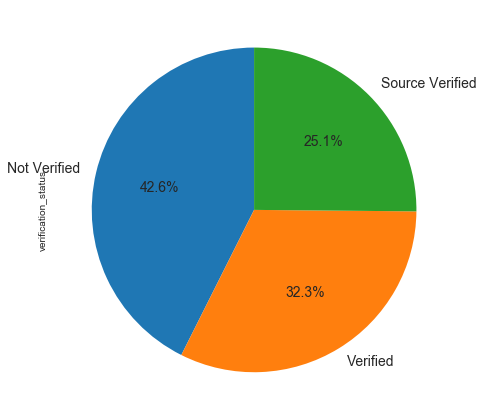

In [27]:
plt.figure(figsize=(16,8))
ax1=plt.subplot(121,aspect='equal')
df.verification_status.value_counts().plot(kind='pie',ax=ax1,autopct='%1.1f%%',startangle=90,shadow=False,legend=False,fontsize=14)
plt.show()

In [28]:
# home_ownership column - 5 unique values : MORTGAGE,RENT,OWN,OTHER & NONE - no case mismatch
# as per data dictionary there is no NONE category.So we are assuming it as NA.
# applicants having house_ownership status as RENT or MORTGAGE were issued most of the loans
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

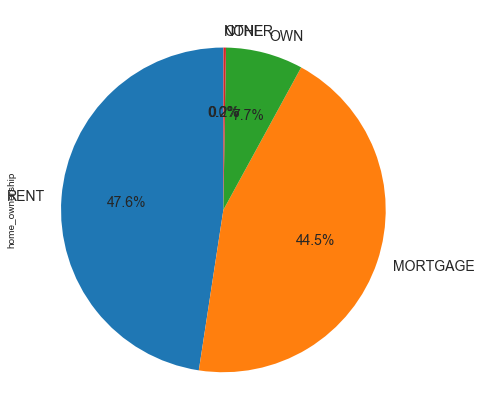

In [29]:
plt.figure(figsize=(16,8))
ax1=plt.subplot(121,aspect='equal')
df.home_ownership.value_counts().plot(kind='pie',ax=ax1,autopct='%1.1f%%',startangle=90,shadow=False,legend=False,fontsize=14)
plt.show()

In [30]:
# purpose column - 14 unique values : car,debt_consolidation etc.- no case mismatch
# Most of the loans were issued for debt_consolidation purpose
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

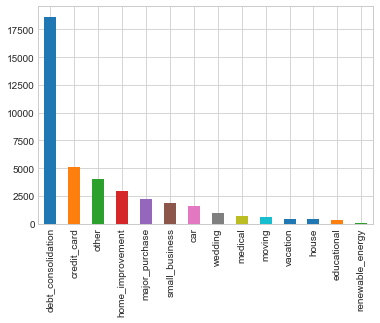

In [31]:
df.purpose.value_counts().plot(kind='bar')
plt.show()

In [32]:
# term column - 2 values : 36 months & 60 months - no case mismatch
# Data issue - remove months from 36 months and 60 months. Rename column as term_in_mths
# most of the loans were issued for term -36 months.
df.term.value_counts()

 36     29096
 60     10621
Name: term, dtype: int64

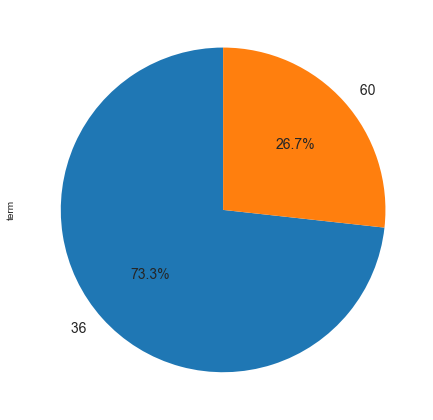

In [33]:
plt.figure(figsize=(16,8))
ax1=plt.subplot(121,aspect='equal')
df.term.value_counts().plot(kind='pie',ax=ax1,autopct='%1.1f%%',startangle=90,shadow=False,legend=False,fontsize=14)
plt.show()

In [34]:
# int_rate column - 371 unique values
# Data issue :- remove % symbol and convert int_rate to numeric
# most of the loans were issued for 10-15 % interest rate
df.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
        ... 
17.90      2
13.84      2
20.20      2
17.15      2
16.33      2
14.62      2
21.82      2
14.88      2
15.83      2
17.03      2
10.64      2
14.70      2
15.01      2
17.46      1
18.72      1
16.20      1
16.01      1
24.40      1
21.48      1
24.59      1
18.36      1
14.67      1
16.15      1
17.44      1
20.52      1
16.96      1
22.64      1
17.34      1
16.71      1
17.54      1
Name: int_rate, Length: 371, dtype: int64

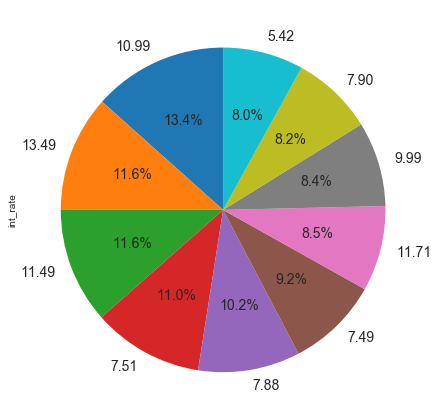

In [35]:
plt.figure(figsize=(16,8))
ax1=plt.subplot(121,aspect='equal')
df.int_rate.value_counts().head(10).plot(kind='pie',ax=ax1,autopct='%1.1f%%',startangle=90,shadow=False,legend=False,fontsize=14)
plt.show()

In [ ]:
################################## Univariate Analysis Ends #####################################

In [ ]:
################################## Bivariate & Segmented Analysis Starts #########################

In [37]:
# dropping the columns 
charge_offDataframe = df.loc[df['loan_status'] =='Charged Off',:]
type(charge_offDataframe)

pandas.core.frame.DataFrame

In [38]:
charge_offDataframe.loc[charge_offDataframe['acc_now_delinq'] !=0, :]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [39]:
# the columns are bit irrelavent with the current dataset so removing this columns from chargeOffDataframe dataset.

charge_offDataframe.drop(['tax_liens','acc_now_delinq','policy_code','delinq_amnt','chargeoff_within_12_mths'], inplace=True,axis =1)

In [40]:
# collections_12_mths_ex_med column is having only 0.0 so, it is not useful for further analysis as the data is singular in nature
charge_offDataframe.collections_12_mths_ex_med.value_counts()

0.0    5621
Name: collections_12_mths_ex_med, dtype: int64

In [41]:
# Majority of values in pub_rec_bankruptcies column is 0.0 . So this columns is also not so useful for default loan analysis.

charge_offDataframe.pub_rec_bankruptcies.value_counts()

0.0    5141
1.0     366
2.0       2
Name: pub_rec_bankruptcies, dtype: int64

In [42]:
# All the values in the column are labelled as "F" so, this column is also not so useful for loan analysis

charge_offDataframe.initial_list_status.value_counts()

f    5627
Name: initial_list_status, dtype: int64

In [43]:
# All the values in the column are labelled as "n" so, this column is also not so useful for loan analysis
charge_offDataframe.pymnt_plan.value_counts()

n    5627
Name: pymnt_plan, dtype: int64

In [44]:
# Majority of values in delinq_2yrs column is 0.0 . So this columns is also not so useful for default loan analysis.
charge_offDataframe.delinq_2yrs.value_counts()

0    4936
1     507
2     130
3      35
4      13
5       3
7       1
6       1
8       1
Name: delinq_2yrs, dtype: int64

In [46]:
# The dataset contains the below columns
charge_offDataframe.info()
charge_offDataframe.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 50 columns):
id                            5627 non-null int64
member_id                     5627 non-null int64
loan_amnt                     5627 non-null int64
funded_amnt                   5627 non-null int64
funded_amnt_inv               5627 non-null float64
term                          5627 non-null object
int_rate                      5627 non-null object
installment                   5627 non-null float64
grade                         5627 non-null object
sub_grade                     5627 non-null object
emp_title                     5143 non-null object
emp_length                    5399 non-null object
home_ownership                5627 non-null object
annual_inc                    5627 non-null float64
verification_status           5627 non-null object
issue_d                       5627 non-null object
loan_status                   5627 non-null object
pymnt_plan                

(5627, 50)

In [47]:
# droping the irrelavent column from charge_offDateframe as part of Data cleanup
charge_offDataframe.drop(['collections_12_mths_ex_med','pub_rec_bankruptcies','initial_list_status','pymnt_plan','url'], axis=1,inplace=True)

In [49]:
#The new dataset have the columns
charge_offDataframe.shape

(5627, 45)

In [50]:
# Creating a new dataframe "bi_variate_distribution" with relavant column to derive the correlation matrix across columns,

bi_variate_distribution = charge_offDataframe.loc[:,['loan_amnt','annual_inc','term','int_rate','grade', 'emp_length','dti', 'home_ownership','verification_status', 'purpose','recoveries' ]]

In [51]:
# For bi variate analysis converting the 'term and  emp_length' columns into int datatype
bi_variate_distribution['term'] = bi_variate_distribution['term'].str.replace('months','')

bi_variate_distribution['term'] = bi_variate_distribution['term'].astype(int)


bi_variate_distribution['emp_length']=bi_variate_distribution.apply(lambda x : str(x['emp_length']).replace('years','').replace('<','').replace('+','').replace('year','').replace('nan','0'),axis=1)
bi_variate_distribution['emp_length'] = bi_variate_distribution['emp_length'].astype(int) 



In [52]:
# Correlation matrix of bi_variate_distribution dataframe
bi_variate_distribution.corr()

,loan_amnt,annual_inc,term,emp_length,dti,recoveries
loan_amnt,1.000000,0.352359,0.389484,0.203906,0.063872,0.310185
annual_inc,0.352359,1.000000,0.079099,0.153898,-0.089725,0.134942
term,0.389484,0.079099,1.000000,0.144298,0.063872,0.130610
emp_length,0.203906,0.153898,0.144298,1.000000,0.048110,0.065308
dti,0.063872,-0.089725,0.063872,0.048110,1.000000,0.030623
recoveries,0.310185,0.134942,0.130610,0.065308,0.030623,1.000000


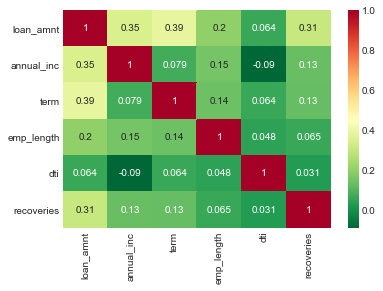

In [53]:
#bi_variate_distribution.corr()
# Correlation matrix with list of continous variable to explore bi-variate distribution across these variable for 'chargeOff' 
 # dataframe

sns.heatmap(bi_variate_distribution.corr(),annot=True , cmap='RdYlGn_r')

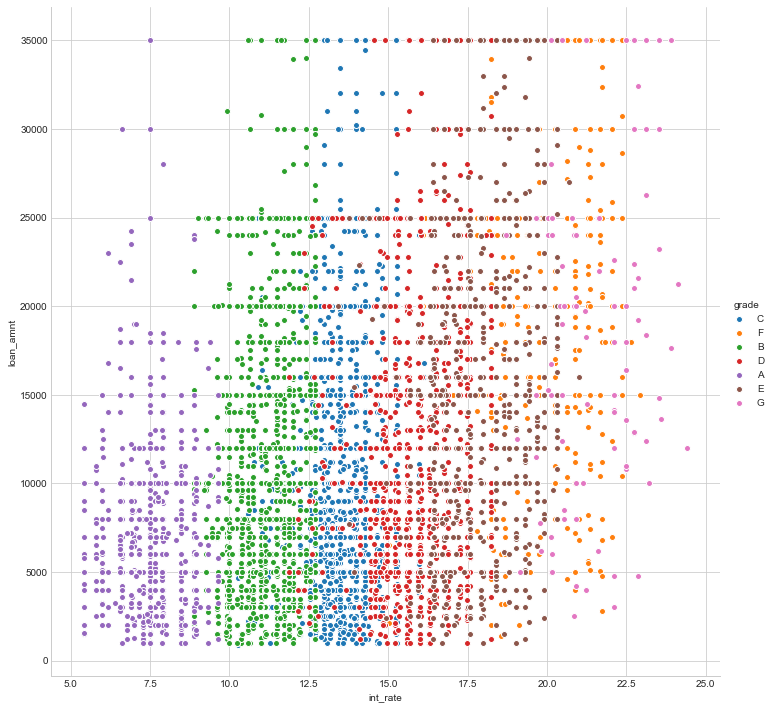

In [67]:

#bi-variate distribution between int_rate vs loan_amt with grade category
bi_variate_distribution['int_rate'] = bi_variate_distribution['int_rate'].astype(float) 

# Scatter plot between two continous variable (int_rate vs loan_amnt ) for bi-variate analysis 
#keeping 'grade' as categorical variable

sns.pairplot(x_vars=["int_rate"], y_vars=["loan_amnt"], data=bi_variate_distribution, hue="grade",size=10)


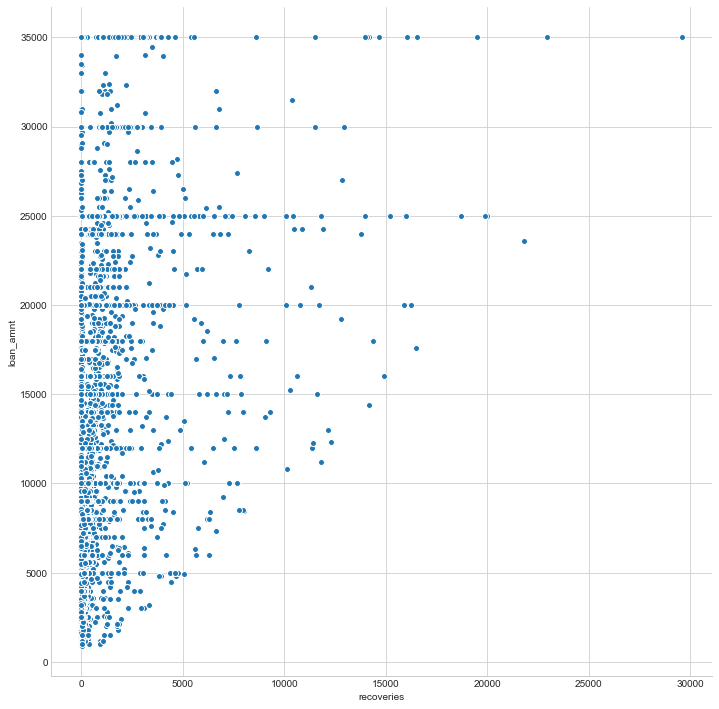

In [68]:
# A bi-variate scatter plot is plotted for 'recoveries' vs 'loan_amnt' . Based on this scatter plot this claerly shows whatever the loan_amnt
# the majority of defaulted loan recovery amount lies between 0 to 5000.

sns.pairplot(x_vars=["recoveries"], y_vars=["loan_amnt"], data=bi_variate_distribution,size=10)

#bi_variate_distribution

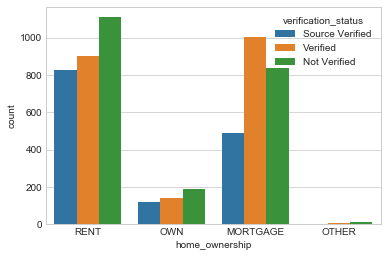

In [63]:
# Uni-variate segmentation Analysis with home_ownership as categorical variable with hue as "verification_status" for "charge Off loans"
# This clearly states that Rent & Mortgage with Non verified loan are major defaulter compared to other verification status. 


sns.countplot(x="home_ownership", data=bi_variate_distribution, hue='verification_status')

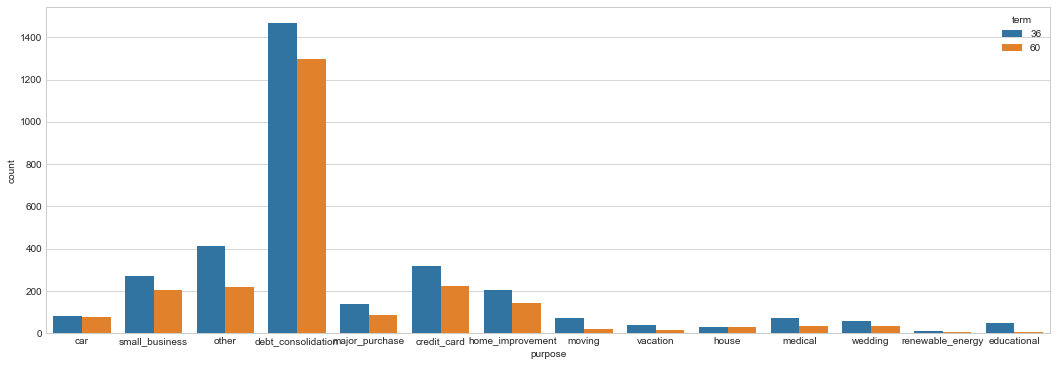

In [64]:
#uni_variate segmentation distribution of 'purpose' with term . 
# Clearly states that loan taken with purpose 'debt_consolidation' is becoming default compared to other loans.
from matplotlib.pyplot import figure, show
figure(figsize=(18,6))
sns.countplot(x="purpose", data=bi_variate_distribution, hue='term')

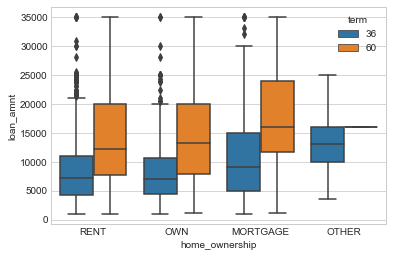

In [65]:
# Segmented uni-variate box plot between home_ownership vs loan_amnt .
# based on the below plot this average of loan_amnt is higher for mortgage "home_ownership" compared to others
# For 60 months term loan average loan_amnt is quite higher compared to 36 month term loan.
sns.boxplot(x="home_ownership", y="loan_amnt",data=bi_variate_distribution, hue="term")

In [ ]:
################################## Bivariate & Segmented Analysis Ends #########################

In [70]:
bi_variate_distribution.head(3)

,loan_amnt,annual_inc,term,int_rate,grade,emp_length,dti,home_ownership,verification_status,purpose,recoveries
1,2500,30000.0,60,15.27,C,1,1.00,RENT,Source Verified,car,117.08
8,5600,40000.0,60,21.28,F,4,5.55,OWN,Source Verified,small_business,189.06
9,5375,15000.0,60,12.69,B,1,18.08,RENT,Verified,other,269.29


In [76]:
######################## Derived Matrix for ROI ########################################
#Find the ROI column using total_pymnt,funded_amnt_inv,funded_amnt

df['ROI']=round(100*((df.total_pymnt-df.funded_amnt_inv)/df.funded_amnt),2)

In [82]:
df[['ROI','loan_status']].head(10)

,ROI,loan_status
0,17.76,Fully Paid
1,-59.65,Charged Off
2,25.24,Fully Paid
3,22.32,Fully Paid
4,17.11,Current
5,12.64,Fully Paid
6,44.44,Fully Paid
7,31.30,Fully Paid
8,-88.46,Charged Off
9,-72.07,Charged Off


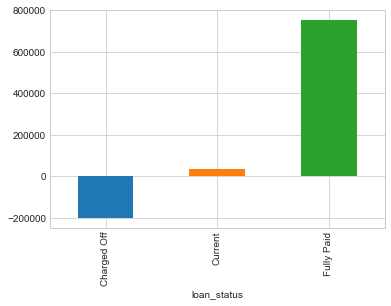

In [81]:
# Investors have a negative ROI for charged off loans, huge loss of money 
# on the other hand ROI from fully paid loans is highest

var = df.groupby('loan_status').ROI.sum() #Group sum of ROI at loan_status level

ax1.set_xlabel('loan_status')  #X-axis label
ax1.set_ylabel('ROI') #Y-axis label
ax1.set_title("Returns from Investments") #Chart title
var.plot(kind='bar')